### ***Proyecto Final***
## ***Descifrando la Huella Digital de la Diabetes: Un Enfoque Predictivo con Data Science***

La diabetes, una enfermedad metabólica crónica caracterizada por niveles elevados de glucosa en sangre, representa una de las principales preocupaciones de salud pública a nivel mundial. Su naturaleza insidiosa y su capacidad para desarrollarse silenciosamente durante años antes de manifestar síntomas evidentes, la convierten en un desafío diagnóstico y de gestión significativo. Con el crecimiento exponencial de los datos de salud disponibles, surge la oportunidad de utilizar herramientas de análisis de datos y técnicas de aprendizaje automático para mejorar la predicción y detección temprana de la diabetes.

En este proyecto, nos proponemos desarrollar un algoritmo para determinar, según una serie de rasgos demográficos, biomédicos y habitos, si un individuo tiene diabetes, prediabetes o no está en riesgo. 

A través de técnicas de análisis exploratorio de datos y modelado predictivo, nuestro objetivo es construir un modelo preciso y generalizable que pueda ayudar a los profesionales de la salud a identificar y abordar los riesgos de diabetes de manera proactiva. 
Al proporcionar una herramienta que pueda estratificar el riesgo individual de diabetes, esperamos contribuir a la prevención temprana, el manejo efectivo y la mejora de los resultados de salud para aquellos en riesgo de esta enfermedad crónica.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [91]:
data = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Los elementos a analizar son los siguientes:
* Diabetes_012: Nos indica el diagnóstico específico de la persona, ya que podría indicar diabetes, prediabetes o la ausencia de la enfermedad.
* HighBP: Refiere a la presencia de un ritmo cardíaco elevado.
* HighChol: Indica la presencia de altos niveles de colesterol en la sangre.
* CholCheck: Señala si la persona se ha sometido a un chequeo de colesterol en los últimos cinco años.
* BMI: Corresponde al índice de masa corporal.
* Smoker: Indica si el individuo es fumador.
* Stroke: Señala si ha habido un accidente cerebrovascular.
* HeartDiseaseorAttack: Representa la presencia de enfermedad coronaria o un infarto de miocardio.
* PhysActivity: Indica la práctica de actividad física en los últimos 30 días.
* Fruits: Indica si la persona consume frutas al menos una vez al día.
* Veggies: Indica si la persona consume verduras al menos una vez al día.
* HvyAlcoholConsump: Señala un alto consumo de alcohol según los criterios establecidos.
* AnyHealthcare: Indica si la persona tiene algún tipo de cobertura de atención médica.
* NoDocbcCost: Señala si ha evitado consultar a un médico debido al costo en los últimos 12 meses.
* GenHlth: Representa la percepción general de la salud.
* MentHlth: Se refiere a la salud mental en los últimos 30 días.
* PhysHlth: Indica la salud física en los últimos 30 días.
* DiffWalk: Señala si la persona tiene dificultades para caminar o subir escaleras.
* Sex: Indica el sexo del individuo.
* Age: Corresponde a su edad.
* Education: Representa el nivel educativo del individuo.
* Income: Indica sus ingresos anuales.

In [92]:
data.shape

(253680, 22)

In [93]:
data.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Se puede comprobar en este caso que no se tienen datos nulos. Es posible que los datos hayan sidos filtrados por el creador del conjunto de datos.

In [94]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Para mejorar los graficos se utiliza una columna nueva donde indicara los estados de los pacientes pero de forma textual en lugar de 0,1,2 como lo especifica el conjunto de datos.

In [95]:
data["Diabetes_str"]= data["Diabetes_012"].replace({0:"No-Diabetico",1:"Diabetico",2:"Pre-Diabetico"})

Text(0.5, 1.0, 'Tipo de Diabetes')

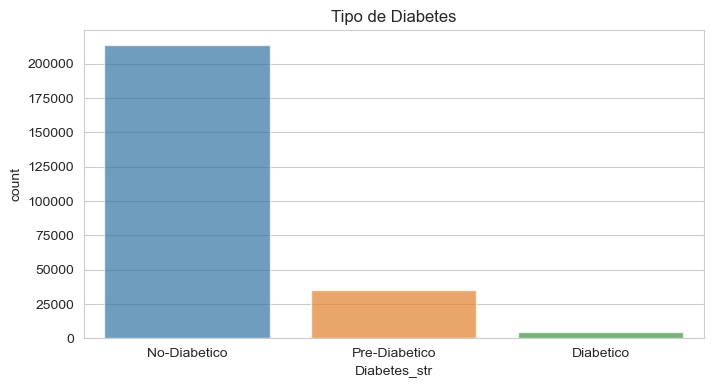

In [96]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x ="Diabetes_str", data=data,alpha=0.7)
ax.set_title("Tipo de Diabetes")

Text(0.5, 1.0, 'Distribucion en el dataset de los tipos de diabetes')

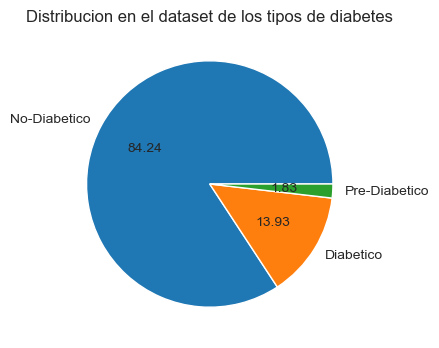

In [97]:
fig, ax = plt.subplots(figsize=(8, 4))
labels = ["No-Diabetico","Diabetico","Pre-Diabetico"]
plt.pie(data["Diabetes_012"].value_counts() ,labels =labels ,autopct='%.02f')
ax.set_title("Distribucion en el dataset de los tipos de diabetes")

Text(0.5, 1.0, 'Proporcion de Fumadores')

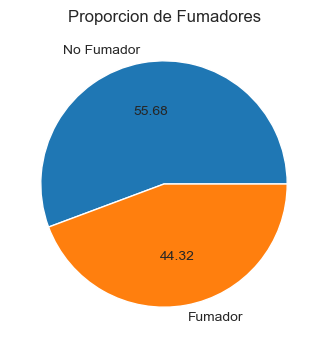

In [98]:
labels=["No Fumador","Fumador"]
fig, ax = plt.subplots(figsize=(8, 4))
plt.pie(data["Smoker"].value_counts() , labels =labels ,autopct='%.02f' )
ax.set_title('Proporcion de Fumadores')

Se puede observar que en el dataset se encuentra una cantidad bastante pareja entre fumadores y no fumadores.

***Tipos de diabetes segun el genero***

Text(0.5, 1.0, 'Tipo de Diabetes deacuerdo al genero')

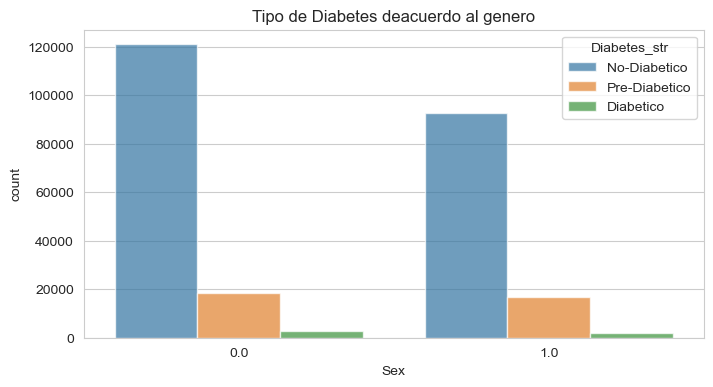

In [99]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x ="Sex", data=data,hue="Diabetes_str",alpha=0.7)
ax.set_title("Tipo de Diabetes deacuerdo al genero")

Tanto para mujeres y hombres se pueden observar que los resultados son muy iguales. Es decir que la diabetes no tiende a desarrollarse mayoritariamente en un sexo en especifico.

Text(0.5, 1.0, 'Distribucion de alta pulsaciones')

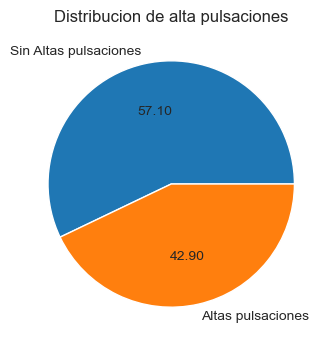

In [100]:
labels=["Sin Altas pulsaciones","Altas pulsaciones"]
fig, ax = plt.subplots(figsize=(8, 4))
plt.pie(data["HighBP"].value_counts() , labels =labels ,autopct='%.02f' )
ax.set_title("Distribucion de alta pulsaciones")

Text(0.5, 1.0, 'Relación entre BP alta, colesterol alto y diabetes')

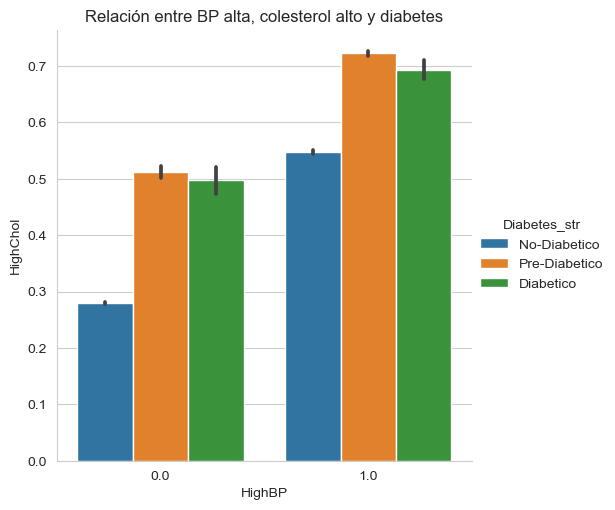

In [101]:
sns.catplot(x="HighBP" , y ="HighChol" , data = data , hue="Diabetes_str" , kind="bar" )
plt.title("Relación entre BP alta, colesterol alto y diabetes")

Text(0.5, 1.0, 'Relacion en fumador, consumo del alcohol y diabetes')

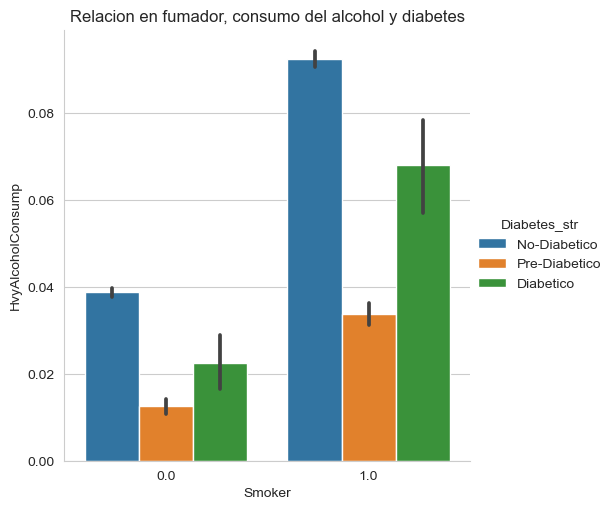

In [102]:
sns.catplot(x="Smoker" , y ="HvyAlcoholConsump",data = data,hue="Diabetes_str",kind="bar");  
plt.title("Relacion en fumador, consumo del alcohol y diabetes")

c:\Users\franf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\franf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\franf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


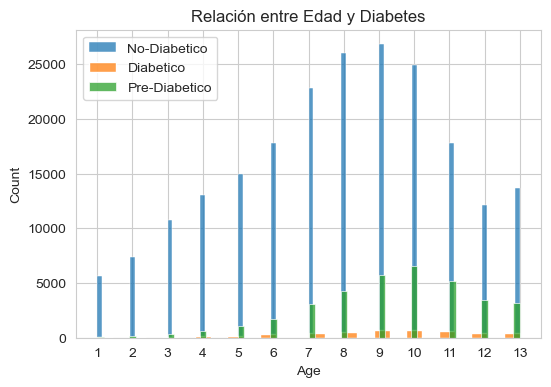

In [103]:
labels = ["No-Diabetico","Diabetico","Pre-Diabetico"]
plt.figure(figsize=(6, 4))
for i in range(0,3):
    sns.histplot(data.Age[data.Diabetes_012 == i], label=labels[i] )
plt.title("Relación entre Edad y Diabetes")
plt.xticks(data["Age"].unique())
plt.legend()

Se puede observar que las persona mayores tienden a poseer diabetes.

In [104]:
data["Education"].unique()

array([4., 6., 3., 5., 2., 1.])

c:\Users\franf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\franf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\franf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


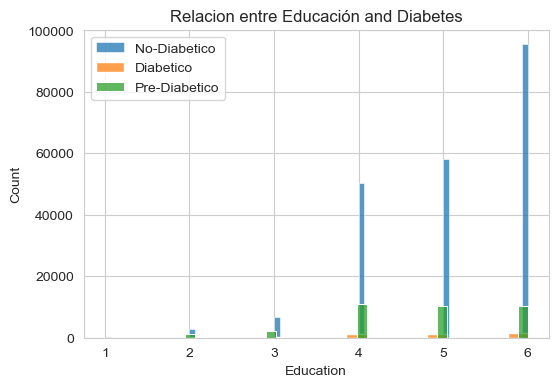

In [105]:
plt.figure(figsize=(6, 4))
for i in range(0,3):
    sns.histplot(data.Education[data.Diabetes_012 == i], label=labels[i] )
plt.title("Relacion entre Educación and Diabetes")

plt.xticks(data["Education"].unique())
plt.legend()

El grafico nos indica que cuando menor sea la educacion del individuo mayor sera la probabilidad de que este padezca diabetes.Esto se puede deber a que la personas con menor ingreso tiende a comer mas comida altas en azucares entre otras cosas por su bajo coste. No manteniendo asi una dieta saludable

Eliminando la columnas con variable texto para hacer la matriz de correlaciones

In [106]:
columnas = data.columns.tolist()
columnas = columnas[:-1]

In [107]:
correlation_matrix = data[columnas].corr().round(2)
print(correlation_matrix)

                      Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  \
Diabetes_012                  1.00    0.27      0.21       0.07  0.22    0.06   
HighBP                        0.27    1.00      0.30       0.10  0.21    0.10   
HighChol                      0.21    0.30      1.00       0.09  0.11    0.09   
CholCheck                     0.07    0.10      0.09       1.00  0.03   -0.01   
BMI                           0.22    0.21      0.11       0.03  1.00    0.01   
Smoker                        0.06    0.10      0.09      -0.01  0.01    1.00   
Stroke                        0.11    0.13      0.09       0.02  0.02    0.06   
HeartDiseaseorAttack          0.18    0.21      0.18       0.04  0.05    0.11   
PhysActivity                 -0.12   -0.13     -0.08       0.00 -0.15   -0.09   
Fruits                       -0.04   -0.04     -0.04       0.02 -0.09   -0.08   
Veggies                      -0.06   -0.06     -0.04       0.01 -0.06   -0.03   
HvyAlcoholConsump           

Se realizara una matriz con aquella correlaciones mayores a 0,2

c:\Users\franf\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, 'Mapa de Calor de Correlación')

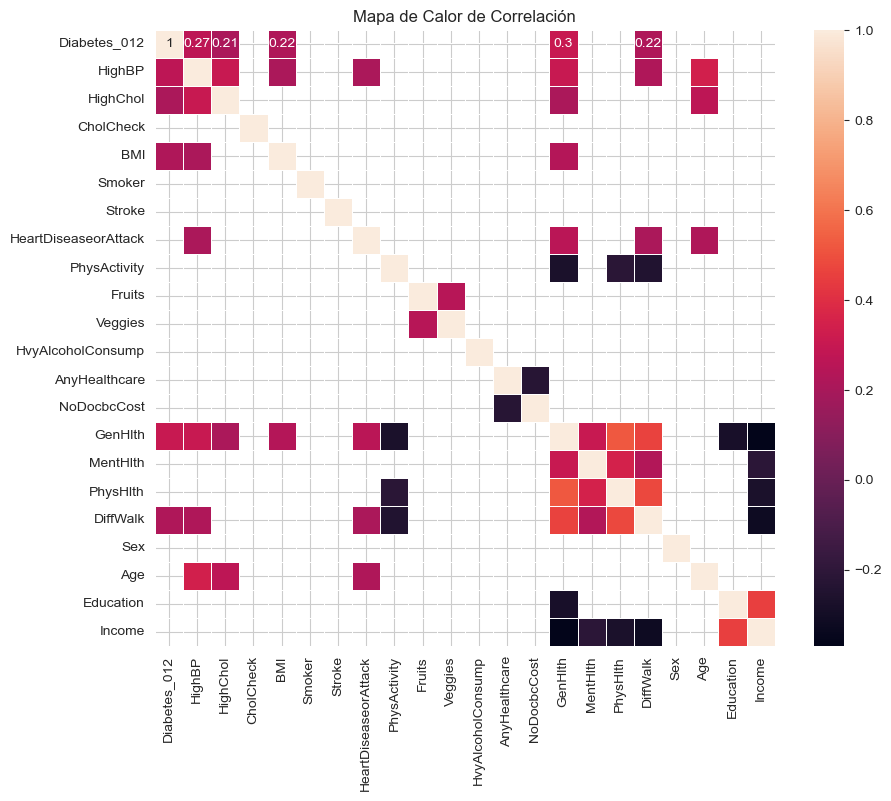

In [108]:
correlation_matrix = data[columnas].corr().round(2)
mask = correlation_matrix.abs() <= 0.2
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5,mask=mask)
plt.title("Mapa de Calor de Correlación")

De esta matriz se puede obtener las siguientes conclusiones:

* GenHlth - PhysHlth: Las personas que informan tener una buena salud general también tienden a tener una buena salud física.

* Education - Income: En general, las personas con niveles más altos de educación tienden a tener ingresos más altos.

* DiffWalk - PhysHlth - GenHelth: Es lógico que las personas que tienen problemas para caminar también tiendan a reportar una peor salud física y tambien de salud en general

* Age - HighBP: A medida que las personas envejecen, es más probable que experimenten presión arterial alta.

* HighBP - PhysHlth: La presión arterial alta puede estar asociada con una serie de problemas de salud que afectan la salud física percibida.

* GenHlth - Age: Esta correlación sugiere que la percepción general de la salud puede verse afectada por la edad. Es posible que a medida que las personas envejecen, perciban su salud de manera diferente.

* GenHlth - Education: Las personas con altos niveles de educación tiendan a tener una mejor percepción de su salud en general.

* GenHlth - HighBP: Es posible que las personas con presión arterial alta tiendan a reportar una peor percepción de su salud en general.

* HeartDiseaseorAttack - GenHlth: Es lógico que las personas con problemas cardíacos puedan tener una percepción más negativa de su salud en general.

## ***Modelos de Prediccion***

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [110]:
data = data[columnas]
X = data.drop(columns=["Diabetes_012"])
Y = data["Diabetes_012"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Para este claso se realizara algoritmos de clasificacion, donde utilizaremos el de Clasificador por decision de arboles, clasificacion de bosques aleatorios.

***Validacion cruzada***

In [111]:
def split_data(X, Y, n_splits=5, shuffle=True, random_state=42):
    kf = StratifiedKFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
    for fold, (train_index, test_index) in enumerate(kf.split(X, Y), 1):
        print(f'Fold:{fold}, Train set: {len(train_index)}, Test set:{len(test_index)}')
split_data(X, Y)

def evaluate_model(model, X, Y, cv, scoring='accuracy'):
    score = cross_val_score(model, X, Y, cv=cv, scoring=scoring)
    print(f'Resultado para cada división: {score}')
    print(f'Promedios resultados: {"{:.2f}".format(score.mean())}')
    
# Asumiendo que X, Y y kf ya están definidos
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluamos DecisionTreeClassifier
evaluate_model(DecisionTreeClassifier(random_state=42), X, Y, cv=kf)

# Evaluamos RandomForestClassifier
evaluate_model(RandomForestClassifier(random_state=42), X, Y, cv=kf)

Fold:1, Train set: 202944, Test set:50736
Fold:2, Train set: 202944, Test set:50736
Fold:3, Train set: 202944, Test set:50736
Fold:4, Train set: 202944, Test set:50736
Fold:5, Train set: 202944, Test set:50736
Resultado para cada división: [0.76813308 0.7663789  0.7663789  0.76722643 0.76834989]
Promedios resultados: 0.77
Resultado para cada división: [0.84210423 0.8412567  0.84208452 0.84094134 0.84090192]
Promedios resultados: 0.84


Se puede observar que el modelo de bosques aleatorio es el mas preciso. Pero ahora vamos a realizar un hypertuneo en el modelo, donde se graficaran la precision que tendra el modelo si modificamos sus paramentros, esto lo hacemos con tal de encontrar algoritmo de mayor precision para este modelo de datos

Average score for max_depth 1: 0.842
Average score for max_depth 2: 0.842
Average score for max_depth 3: 0.842
Average score for max_depth 4: 0.844
Average score for max_depth 5: 0.848
Average score for max_depth 6: 0.848
Average score for max_depth 7: 0.847
Average score for max_depth 8: 0.847
Average score for max_depth 9: 0.847
Average score for max_depth 10: 0.846
Average score for max_depth 11: 0.844
Average score for max_depth 12: 0.841
Average score for max_depth 13: 0.837
Average score for max_depth 14: 0.832
Average score for max_depth 15: 0.826
Average score for max_depth 16: 0.819
Average score for max_depth 17: 0.813
Average score for max_depth 18: 0.806
Average score for max_depth 19: 0.798


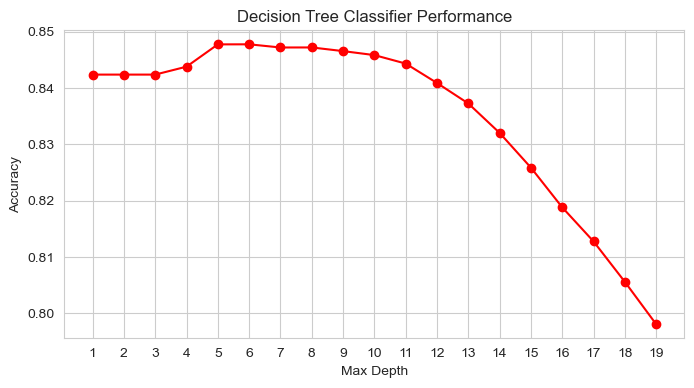

In [112]:
max_depth = np.arange(1,20)
result_data = []

for val in max_depth:
    score = cross_val_score(DecisionTreeClassifier(max_depth=val, random_state=42), X, Y, cv=kf, scoring="accuracy").mean()
    result_data.append(score)
    print(f'Average score for max_depth {val}: {score:.3f}')

plt.figure(figsize=(8, 4))
plt.plot(max_depth, result_data, marker='o', linestyle='-', color='r')
plt.title('Decision Tree Classifier Performance')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(max_depth)
plt.show()

En este caso se puede observar que la calibracion del algoritmo nos permitio obtener mejores resultados que sin tunearlo

In [113]:
model_Tree = DecisionTreeClassifier(max_depth=5, random_state=42)
model_Tree.fit(X_train,y_train)
y_pred_tree = model_Tree.predict(X_test)

Classification_Report: 

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92     42826
         1.0       0.00      0.00      0.00       933
         2.0       0.56      0.12      0.20      6977

    accuracy                           0.85     50736
   macro avg       0.47      0.37      0.37     50736
weighted avg       0.80      0.85      0.80     50736



c:\Users\franf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\franf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\franf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


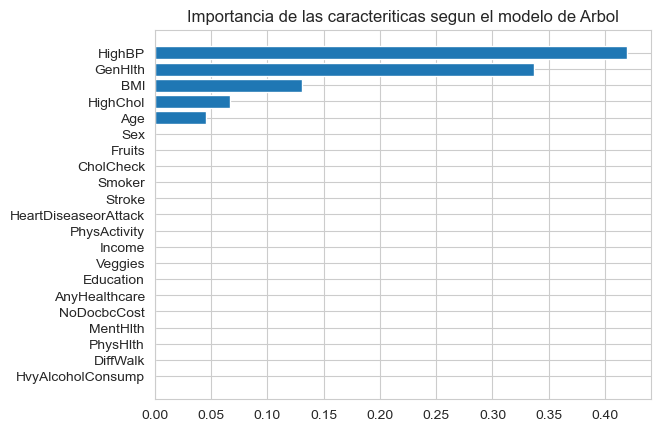

In [114]:
feature_importance = model_Tree.feature_importances_
sorted_idx = np.argsort(feature_importance)
features = X.columns
plt.figure()
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features[sorted_idx])
plt.title('Importancia de las caracteriticas segun el modelo de Arbol')
plt.show()

Segun el algoritmo recien entrenado pudimos las principales caracteristicas al momento de determinar el estado de la diabetes de un individuo.
Importante a tener en cuenta que esta escala expresa el importancia solo para este algoritmo.

In [115]:
#Grafico de la modificación de los parametros para realizar el modelo con Ramdon Forest

n_estimators = np.arange(50,151,50)
result_data = []

for val in n_estimators:
    score = cross_val_score(RandomForestClassifier(n_estimators=val, random_state=42), X, Y, 
                            cv=kf, scoring="accuracy").mean()
    result_data.append(score)
    print(f'Average score for {val} estimators: {score:.3f}')

plt.figure(figsize=(8, 4))
plt.plot(n_estimators, result_data, marker='o', linestyle='-', color='b')
plt.title('Random Forest Classifier Performance')
plt.xlabel('Número de estimadores')
plt.ylabel('Precisión')
plt.grid(True)
plt.xticks(n_estimators)
plt.show()

Average score for 50 estimators: 0.840
Average score for 100 estimators: 0.841
Average score for 150 estimators: 0.842
Average score for 200 estimators: 0.842
Average score for 250 estimators: 0.842


KeyboardInterrupt: 

En este caso se puede observar que las 100 interaciones se obtiene mayor precision. 

### ***PCA para reduccion de variables***

In [116]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [117]:
pca.components_

array([[ 8.99102899e-03,  6.86581413e-03,  5.25977240e-04,
         1.67499622e-01,  6.77934070e-03,  3.03556559e-03,
         5.26469137e-03, -1.05865381e-02, -3.64626767e-03,
        -3.34152936e-03, -3.89833331e-04, -6.96034909e-04,
         5.68782849e-03,  6.17797005e-02,  5.26177325e-01,
         8.27884252e-01,  1.88696004e-02, -3.18359574e-03,
         1.28122721e-02, -1.85123701e-02, -6.79595792e-02],
       [ 1.38962535e-02,  6.14319885e-03,  9.85652380e-04,
         9.78627149e-01, -1.43505738e-03, -3.98652342e-04,
         9.31456026e-04, -6.38874438e-03, -5.14795340e-03,
        -2.74209632e-03, -1.82988046e-03, -2.31906201e-04,
         9.04394886e-05,  1.97537859e-02, -1.84705094e-01,
        -8.33491231e-02,  5.59040377e-03,  4.81937073e-03,
        -1.57800430e-02, -1.04724404e-02, -1.04562199e-02],
       [-4.60642724e-03, -2.57930960e-03, -9.54112190e-04,
         1.08235813e-01, -3.21229197e-04, -1.49704116e-03,
        -3.67957188e-03,  2.12800906e-03, -3.36638596e

In [118]:
pca.explained_variance_ratio_

array([4.81972217e-01, 2.20247604e-01, 2.11864556e-01, 4.78282237e-02,
       2.10138679e-02, 4.23801359e-03, 3.37889710e-03, 1.49894715e-03,
       1.22640244e-03, 1.19777892e-03, 1.10295174e-03, 8.67862158e-04,
       8.17007799e-04, 6.55334947e-04, 4.82928545e-04, 3.85507953e-04,
       3.79864816e-04, 2.66802494e-04, 2.15299634e-04, 1.84157878e-04,
       1.75774343e-04])

In [119]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
print(var_cumu)

[0.48197222 0.70221982 0.91408438 0.9619126  0.98292647 0.98716448
 0.99054338 0.99204233 0.99326873 0.99446651 0.99556946 0.99643732
 0.99725433 0.99790966 0.99839259 0.9987781  0.99915797 0.99942477
 0.99964007 0.99982423 1.        ]


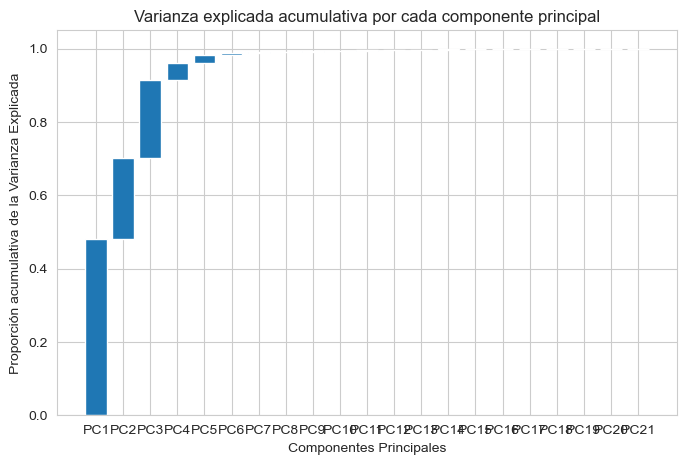

In [120]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Nombres de los componentes
components = [f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))]

# Creando el gráfico de barras apiladas
plt.figure(figsize=(8, 5))

# Barra base (la primera barra)
plt.bar(components, [cumulative_variance_ratio[0]] + list(np.diff(cumulative_variance_ratio)), 
        bottom=[0] + list(cumulative_variance_ratio[:-1]))

plt.title('Varianza explicada acumulativa por cada componente principal')
plt.xlabel('Componentes Principales')
plt.ylabel('Proporción acumulativa de la Varianza Explicada')
plt.show()

Se puede observar en el grafico de las componentes PCA que podemos reducir las 22 variables en 6 sin perder precision en el algoritmo.
Por lo tanto procederemos a realizar los mismos algoritmo que realizamos anteriormente para determinar si encontramos una mejora o reduccion en los tiempo de carga debido al uso de menores volumenes de datos

In [121]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=6)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(202944, 6)

In [122]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(6, 6)

In [123]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(50736, 6)

In [129]:
learner_pca = RandomForestClassifier(n_estimators=100)
learner_pca.fit(df_train_pca, y_train)
y_log_pca = learner_pca.predict(df_test_pca)
print("Classification_Report: \n")
print(classification_report(y_test,y_log_pca))

KeyboardInterrupt: 

In [128]:
learner_pca2 = DecisionTreeClassifier()
learner_pca2.fit(df_train_pca, y_train)
y_log_pca2 = learner_pca2.predict(df_test_pca)
print("Classification_Report: \n")
print(classification_report(y_test,y_log_pca2))

Classification_Report: 

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87     42826
         1.0       0.02      0.03      0.03       933
         2.0       0.27      0.27      0.27      6977

    accuracy                           0.77     50736
   macro avg       0.39      0.39      0.39     50736
weighted avg       0.77      0.77      0.77     50736



Se puede observar que en ambos modelos con variables reducidas se pudo reducir de manera exitos las variables

### ***Conclusiones***

A lo largo del informe, se han extraído diversas conclusiones a partir de los datos, como la relación entre la alimentación y los ingresos, la asociación entre la diabetes y la edad o el índice de masa corporal, entre otros aspectos. Se ha observado que hay múltiples factores que pueden influir en la determinación de si una persona tiene o no diabetes. Sin embargo, es importante reconocer que estos datos son bastante generales y, en algunos casos, pueden estar sesgados por la autocalificación de los individuos encuestados, como ocurre al preguntarles sobre su percepción de su salud en una escala. Por lo tanto, se recomienda que algunos datos sean validados por profesionales de la salud para garantizar una mayor precisión.

Por consiguiente, mi recomendación es que este modelo se utilice como una herramienta para un autodiagnóstico preliminar, pero siempre se insista en que se consulte a un profesional de la salud una vez realizado. ***Esto no debería en ningún caso sustituir la necesidad de una evaluación médica completa y regular***.